# IPL Matches Descriptive Data Analysis

In [1]:
#Importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# Data Preparation and Cleaning

In [13]:
ipl_df = pd.read_csv('matches.csv')
ipl_df.head(5)
ipl_df.tail(5)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi
815,1237181,Dubai,2020-11-10,TA Boult,Dubai International Cricket Stadium,0,Delhi Capitals,Mumbai Indians,Delhi Capitals,bat,Mumbai Indians,wickets,5.0,N,NaN,CB Gaffaney,Nitin Menon


In [6]:
ipl_df.shape

(816, 17)

In [7]:
ipl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

We see that in the umpire3 column, we have only 119 non-null objects. So we can discard them without any issue. Also, we will discard the umpire1 and umpire2 columns since they won't be useful in our data analysis.

In [21]:
deliveries_df = pd.read_csv('deliveries.csv')
deliveries_df.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [10]:
deliveries_df.shape

(193468, 18)

In [11]:
deliveries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193468 non-null  int64 
 1   inning            193468 non-null  int64 
 2   over              193468 non-null  int64 
 3   ball              193468 non-null  int64 
 4   batsman           193468 non-null  object
 5   non_striker       193468 non-null  object
 6   bowler            193468 non-null  object
 7   batsman_runs      193468 non-null  int64 
 8   extra_runs        193468 non-null  int64 
 9   total_runs        193468 non-null  int64 
 10  non_boundary      193468 non-null  int64 
 11  is_wicket         193468 non-null  int64 
 12  dismissal_kind    9495 non-null    object
 13  player_dismissed  9495 non-null    object
 14  fielder           6784 non-null    object
 15  extras_type       10233 non-null   object
 16  batting_team      193468 non-null  obj

In [14]:
# for ipl_df dataframe
discard_columns = ['umpire1','umpire2']

ipl_df = ipl_df.drop(discard_columns, axis=1)

ipl_df.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN


In [15]:
ipl_df.team1.value_counts()

Royal Challengers Bangalore    108
Mumbai Indians                  97
Kolkata Knight Riders           95
Chennai Super Kings             94
Kings XI Punjab                 92
Delhi Daredevils                83
Rajasthan Royals                70
Sunrisers Hyderabad             59
Deccan Chargers                 39
Pune Warriors                   23
Delhi Capitals                  19
Gujarat Lions                   16
Rising Pune Supergiants          7
Kochi Tuskers Kerala             7
Rising Pune Supergiant           7
Name: team1, dtype: int64

In [16]:
ipl_df.result.value_counts()

wickets    435
runs       364
tie         13
Name: result, dtype: int64

# Exploratory Analysis and Visualization

In [17]:
ipl_df.sample(10)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method
103,392228,Johannesburg,2009-05-16,RG Sharma,New Wanderers Stadium,1,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,field,Deccan Chargers,wickets,6.0,N,NaN
637,1136562,Chandigarh,2018-04-08,KL Rahul,"Punjab Cricket Association IS Bindra Stadium, ...",0,Kings XI Punjab,Delhi Daredevils,Kings XI Punjab,field,Kings XI Punjab,wickets,6.0,N,NaN
781,1216517,Dubai,2020-10-18,KL Rahul,Dubai International Cricket Stadium,0,Mumbai Indians,Kings XI Punjab,Mumbai Indians,bat,Kings XI Punjab,tie,NaN,Y,NaN
174,419165,Mumbai,2010-04-25,SK Raina,Dr DY Patil Sports Academy,0,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,Chennai Super Kings,runs,22.0,N,NaN
107,392232,Johannesburg,2009-05-19,JH Kallis,New Wanderers Stadium,1,Royal Challengers Bangalore,Delhi Daredevils,Delhi Daredevils,bat,Royal Challengers Bangalore,wickets,7.0,N,NaN
668,1136593,Kolkata,2018-05-03,SP Narine,Eden Gardens,0,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,field,Kolkata Knight Riders,wickets,6.0,N,NaN
562,980991,Chandigarh,2016-05-15,HM Amla,"Punjab Cricket Association IS Bindra Stadium, ...",0,Kings XI Punjab,Sunrisers Hyderabad,Kings XI Punjab,bat,Sunrisers Hyderabad,wickets,7.0,N,NaN
458,829705,Kolkata,2015-04-08,M Morkel,Eden Gardens,0,Kolkata Knight Riders,Mumbai Indians,Kolkata Knight Riders,field,Kolkata Knight Riders,wickets,7.0,N,NaN
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN
58,392181,Cape Town,2009-04-18,SR Tendulkar,Newlands,1,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,field,Mumbai Indians,runs,19.0,N,NaN


In [18]:
city_host = ipl_df.city.value_counts()
city_host

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          65
Hyderabad          64
Chennai            57
Chandigarh         56
Jaipur             47
Pune               38
Abu Dhabi          29
Dubai              26
Bengaluru          15
Durban             15
Visakhapatnam      13
Sharjah            12
Centurion          12
Ahmedabad          12
Rajkot             10
Dharamsala          9
Indore              9
Johannesburg        8
Port Elizabeth      7
Cuttack             7
Cape Town           7
Ranchi              7
Raipur              6
Kochi               5
Kanpur              4
Kimberley           3
Nagpur              3
East London         3
Bloemfontein        2
Name: city, dtype: int64

C:\Users\Parth Sharma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


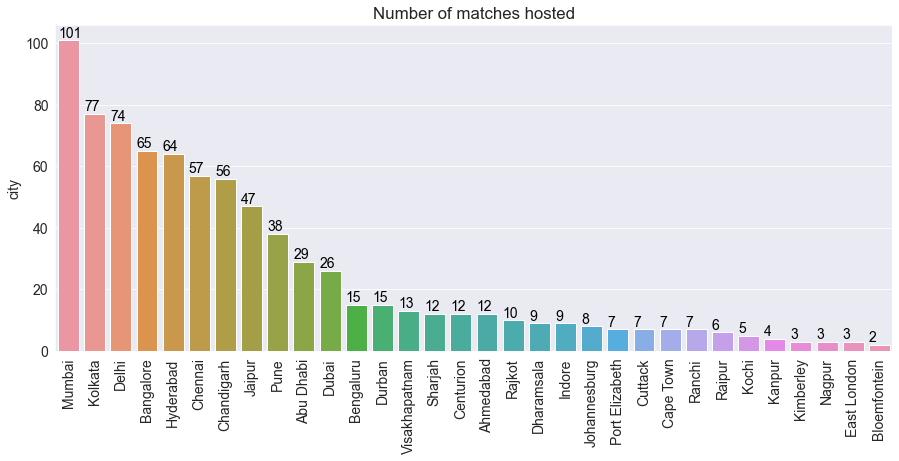

In [19]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
plt.title('Number of matches hosted')
count=0
cities=pd.DataFrame(city_host)
cities['name']=city_host.index
for i in cities['city']:
    plt.text(count-0.4,i+1,str(i),color='black')
    count+=1
sns.barplot(city_host.index, city_host);

# Maximum Runs Scored By Different Players In An Inning


In [22]:
batting_ings = deliveries_df.groupby(['id','batsman']).apply(lambda x : np.sum(x['batsman_runs'])).reset_index(name='Innings Runs')
sorted_batting_ings = batting_ings.sort_values(by='Innings Runs',ascending=False)
top_batsmen_scores = sorted_batting_ings[:10] 
ball_faced = deliveries_df.groupby(['id','batsman']).apply(lambda x : x['batsman_runs'].count()).reset_index(name='Balls Faced')
batsmen_performance = pd.merge(top_batsmen_scores, ball_faced, how='inner', left_on=['id','batsman'], right_on=['id','batsman'])
batsmen_performance['Strike Rate for Match'] = batsmen_performance['Innings Runs']*100 / batsmen_performance['Balls Faced']
batsmen_innings = pd.merge(batsmen_performance, deliveries_df, how='inner',left_on=['id','batsman'],right_on=['id','batsman'])
batsmen_innings_table = batsmen_innings.iloc[:,1:8]
batsmen_innings_table2 = batsmen_innings_table.drop_duplicates()
batsmen_innings_table2

,batsman,Innings Runs,Balls Faced,Strike Rate for Match,inning,over,ball
0,CH Gayle,175,69,253.623188,1,19,1
1,CH Gayle,175,69,253.623188,1,19,2
2,CH Gayle,175,69,253.623188,1,19,5
3,CH Gayle,175,69,253.623188,1,11,7
4,CH Gayle,175,69,253.623188,1,11,8
...,...,...,...,...,...,...,...
630,V Sehwag,122,62,196.774194,1,17,3
631,V Sehwag,122,62,196.774194,1,17,4
632,V Sehwag,122,62,196.774194,1,17,5
633,V Sehwag,122,62,196.774194,1,17,6


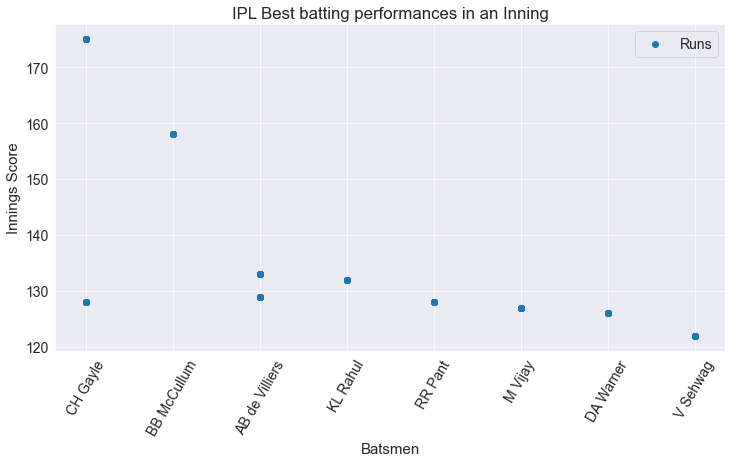

In [23]:
x=batsmen_innings_table2['batsman']
y1=batsmen_innings_table2['Innings Runs']
plt.figure(figsize=(12,6))
plt.scatter(x,y1)
plt.xlabel('Batsmen',size=15)
plt.ylabel('Innings Score',size=15)
plt.title('IPL Best batting performances in an Inning')
plt.xticks(rotation=60)
plt.legend(['Runs']);

We can see that Chris Gayle is the one who has scored the maximum runs(175*) in a match followed by Brendon McCullum and AB de Villiers.

Well, if you are an IPL fan, you must have been aware of this Gayle Storm that hit the Chinnaswamy Stadium on April 23,2013. Gayle scored an unbeaten 175 against Pune Warriors with 17 sixes and 13 fours in just 66 balls and a strike rate of 265.15 . Isn't that something the Universe Boss can only do??

In the above graph, we can see two players, Chris Gayle and AB de Villers, have appeared twice and they both play for Royal Challengers Bangalore. But there's a fun fact, despite having world class players like Gayle, Kohli and ABD , RCB has never won any season of IPL.

# Maximum Wickets taken by bowlers in last 12 seasons


In [24]:
bowling_wickets = deliveries_df[deliveries_df['dismissal_kind']!='run out']
bowling_total = bowling_wickets.groupby('bowler').apply(lambda x : x['dismissal_kind'].dropna()).reset_index(name='Wickets')
bowling_wicket_count = bowling_total.groupby('bowler').count().reset_index()
bowling_top = bowling_wicket_count.sort_values(by='Wickets',ascending=False)
top_bowlers = bowling_top.loc[:,['bowler','Wickets']][0:10]
top_bowlers

,bowler,Wickets
297,SL Malinga,170
5,A Mishra,160
235,PP Chawla,156
85,DJ Bravo,153
115,Harbhajan Singh,150
240,R Ashwin,138
50,B Kumar,136
304,SP Narine,127
357,YS Chahal,121
338,UT Yadav,119


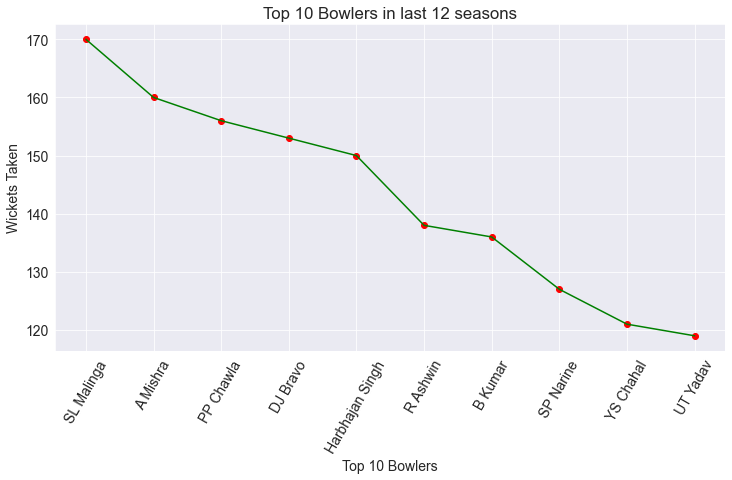

In [25]:
plt.figure(figsize=(12,6))
plt.scatter(top_bowlers['bowler'],top_bowlers['Wickets'],color='r');
plt.plot(top_bowlers['bowler'],top_bowlers['Wickets'],color='g');
plt.xticks(rotation=60)
plt.xlabel('Top 10 Bowlers')
plt.ylabel('Wickets Taken')
plt.title('Top 10 Bowlers in last 12 seasons');

# Matches Played vs Matches Won

In [26]:
matches_played=pd.concat([ipl_df['team1'],ipl_df['team2']])
matches_played=matches_played.value_counts().reset_index()
matches_played.columns=['Team','Total Matches']
matches_played['wins']=ipl_df['winner'].value_counts().reset_index()['winner']

matches_played.set_index('Team',inplace=True)

In [27]:
matches_played.reset_index()

,Team,Total Matches,wins
0,Mumbai Indians,203,120
1,Royal Challengers Bangalore,195,106
2,Kolkata Knight Riders,192,99
3,Kings XI Punjab,190,91
4,Chennai Super Kings,178,88
5,Delhi Daredevils,161,81
6,Rajasthan Royals,161,67
7,Sunrisers Hyderabad,124,66
8,Deccan Chargers,75,29
9,Pune Warriors,46,19


In [28]:
win_percentage = round(matches_played['wins']/matches_played['Total Matches'],3)*100
win_percentage

Team
Mumbai Indians                 59.1
Royal Challengers Bangalore    54.4
Kolkata Knight Riders          51.6
Kings XI Punjab                47.9
Chennai Super Kings            49.4
Delhi Daredevils               50.3
Rajasthan Royals               41.6
Sunrisers Hyderabad            53.2
Deccan Chargers                38.7
Pune Warriors                  41.3
Delhi Capitals                 39.4
Gujarat Lions                  40.0
Rising Pune Supergiant         62.5
Rising Pune Supergiants        42.9
Kochi Tuskers Kerala           35.7
dtype: float64

C:\Users\Parth Sharma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


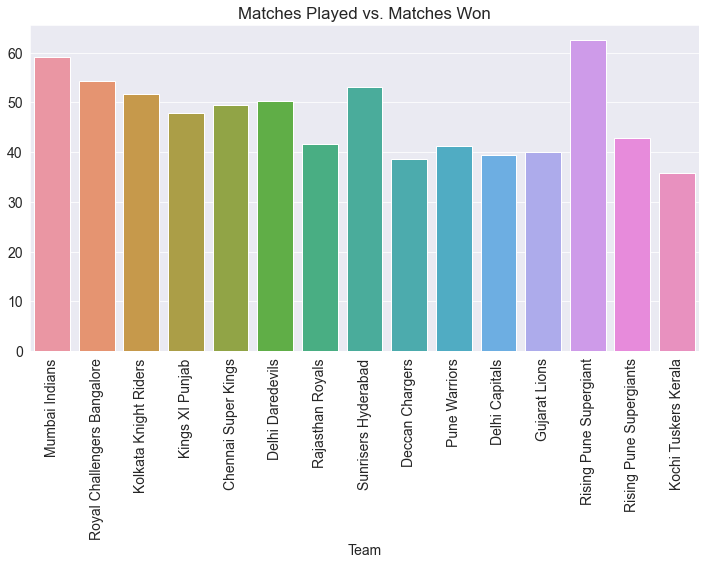

In [29]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
plt.title('Matches Played vs. Matches Won')
sns.barplot(matches_played['Total Matches'].index, win_percentage);

# Maximum Runs Scored By A Team


In [31]:
high_scores = deliveries_df.groupby(['id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index() 
high_scores = high_scores[high_scores['total_runs']>=200]
high_scores.nlargest(10,'total_runs')

,id,inning,batting_team,bowling_team,total_runs
700,598027,1,Royal Challengers Bangalore,Pune Warriors,263
1116,980987,1,Royal Challengers Bangalore,Gujarat Lions,248
292,419137,1,Chennai Super Kings,Rajasthan Royals,246
1354,1136604,1,Kolkata Knight Riders,Kings XI Punjab,245
2,335983,1,Chennai Super Kings,Kings XI Punjab,240
1000,829795,1,Royal Challengers Bangalore,Mumbai Indians,235
472,501260,1,Kings XI Punjab,Royal Challengers Bangalore,232
1480,1178422,1,Kolkata Knight Riders,Mumbai Indians,232
398,501223,1,Delhi Daredevils,Kings XI Punjab,231
850,733987,1,Kings XI Punjab,Chennai Super Kings,231


# Biggest win by runs each season


In [35]:
season = ipl_df.season.values
year = []
for i in range(len(season)):
    year.append(int(season[i][4:8]))
ipl_df['Year'] = year
ipl_df

AttributeError: 'DataFrame' object has no attribute 'season'

In [34]:
y = 2008
season=[]
win_by_runs_max=[]
while y<2020:
    season.append(y)
    win_by_runs_max.append(ipl_df[ipl_df['Year']==y]['win_by_runs'].max())
    y += 1
win_by_runs_max

KeyError: 'Year'

ValueError: x and y must have same first dimension, but have shapes (1,) and (0,)

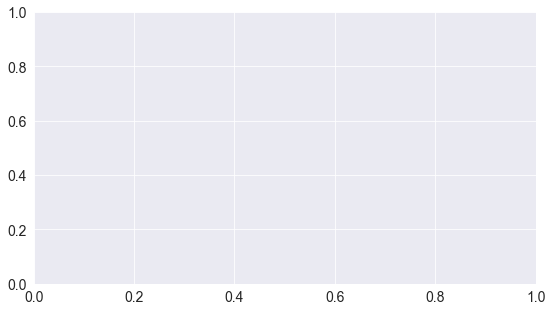

In [36]:
plt.plot(season,win_by_runs_max)
plt.scatter(season,win_by_runs_max)
count=0
while count < 12:
    plt.text(season[count]+0.1,win_by_runs_max[count],str(win_by_runs_max[count]),size=14)
    count+=1
plt.xticks(range(2008,2020),fontsize=14)
plt.xlabel('Season')
plt.ylabel('Runs')
plt.title('Biggest win by runs per season',fontsize=14)
plt.show()

# Asking and Answering Questions
Now, let us answer some basic questions that one might want to know about the IPL seasons.



# Q. Which team won the maximum number of matches in all seasons?

In [37]:
winner = ipl_df.winner.value_counts()
winner

Mumbai Indians                 120
Chennai Super Kings            106
Kolkata Knight Riders           99
Royal Challengers Bangalore     91
Kings XI Punjab                 88
Rajasthan Royals                81
Delhi Daredevils                67
Sunrisers Hyderabad             66
Deccan Chargers                 29
Delhi Capitals                  19
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

We can see that Mumbai Indians have won the maximum number of matches in the last 12 seasons of IPL, followed by Chennai Super Kings and Kolkata Knight Riders. So, we may say that Mumbai Indians has been the most successful team in the IPL. We can also see that few teams like Kochi Tuskers Kerala, Delhi Capitals, Pune Warriors, etc. have won very less number of matches. The reason for this is they had played the IPL for just 1 or 2 seasons.

C:\Users\Parth Sharma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


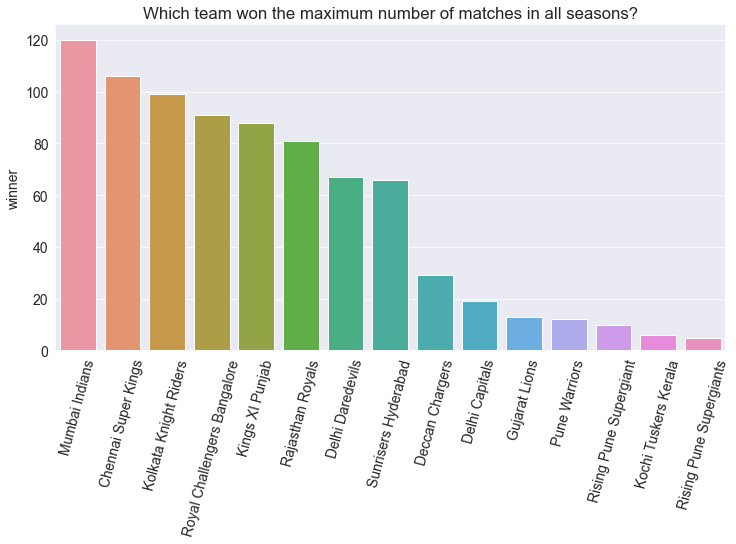

In [38]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('Which team won the maximum number of matches in all seasons?')
sns.barplot(winner.index, winner);

# Q. Which player has become the Man of the Match most number of times?

In [39]:
m_o_m = ipl_df.player_of_match.value_counts()
m_o_m

AB de Villiers    23
CH Gayle          22
RG Sharma         18
DA Warner         17
MS Dhoni          17
                  ..
MN Samuels         1
S Anirudha         1
CL White           1
MD Mishra          1
AP Tare            1
Name: player_of_match, Length: 233, dtype: int64

C:\Users\Parth Sharma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


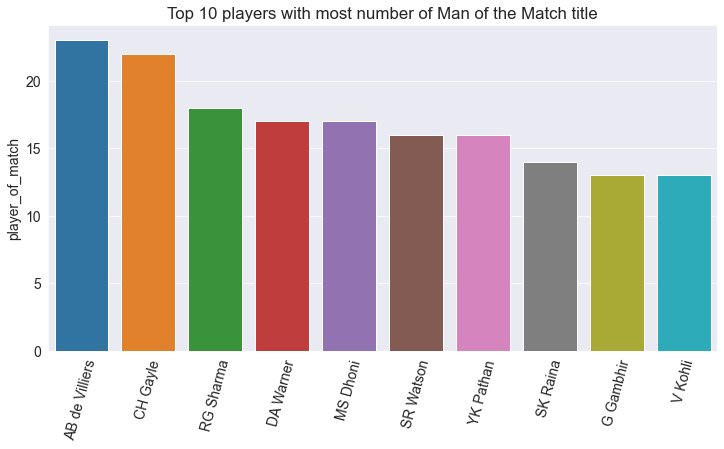

In [40]:
m_o_m_10 = m_o_m[:10]
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('Top 10 players with most number of Man of the Match title')
sns.barplot(m_o_m_10.index, m_o_m_10);

# Q. Does winning the toss increase the chances of winning the match?

In [41]:
win = ipl_df.winner == ipl_df.toss_winner
win_counts = win.value_counts()
win_counts

True     418
False    398
dtype: int64

In [42]:
round((win_counts/win.count())*100,2)

True     51.23
False    48.77
dtype: float64

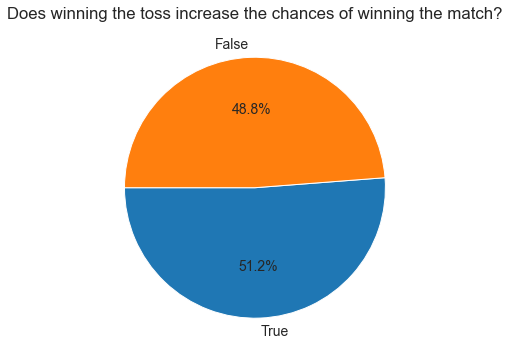

In [43]:
plt.figure(figsize=(12,6))
plt.title('Does winning the toss increase the chances of winning the match?')
plt.pie(win_counts,labels=win_counts.index,autopct='%1.1f%%', startangle=180);

# Q. Who are the Top 5 scoring batsmen?

In [44]:
batsmen = deliveries_df.groupby('batsman').apply(lambda x : np.sum(x['batsman_runs'])).reset_index(name='Runs')
batsmen_sorted=batsmen.sort_values(by='Runs',ascending=False)
top_batsmen=batsmen_sorted[:5]
top_batsmen

,batsman,Runs
505,V Kohli,5878
438,SK Raina,5368
116,DA Warner,5254
379,RG Sharma,5230
407,S Dhawan,5197


C:\Users\Parth Sharma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


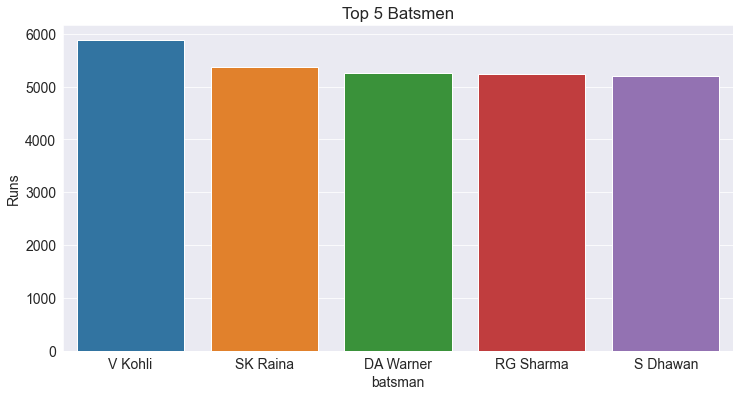

In [45]:
plt.figure(figsize=(12,6))
plt.title('Top 5 Batsmen')
sns.barplot(top_batsmen['batsman'],top_batsmen['Runs']);

# Q. What is the maximum run by which a team won?

In [48]:
batting_first_team = ipl_df[ipl_df.result_margin != 0]
batting_first_team.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN


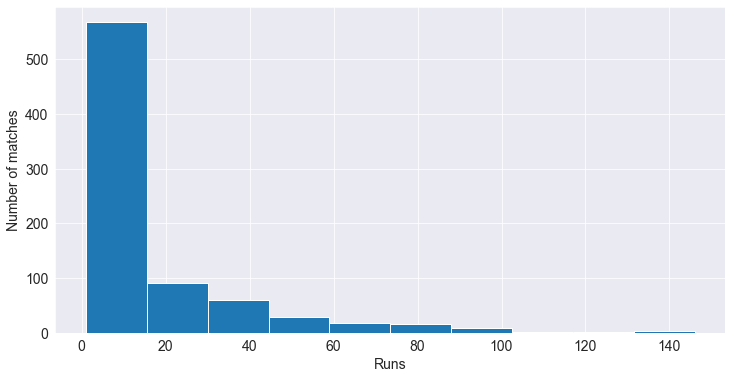

In [50]:
plt.figure(figsize=(12,6))
plt.hist(batting_first_team['result_margin'])
plt.xlabel('Runs')
plt.ylabel('Number of matches')
plt.show()

# What is the maximum wicket by a which a team won?

In [94]:
bowling_first_team = ipl_df[ipl_df.win_by_wickets != 0]
bowling_first_team.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,Year
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Rising Pune Supergiants,0,7,SPD Smith,Maharashtra Cricket Association Stadium,2017
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,2017
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,2017
5,6,IPL-2017,Hyderabad,09-04-2017,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",2017
6,7,IPL-2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,2017


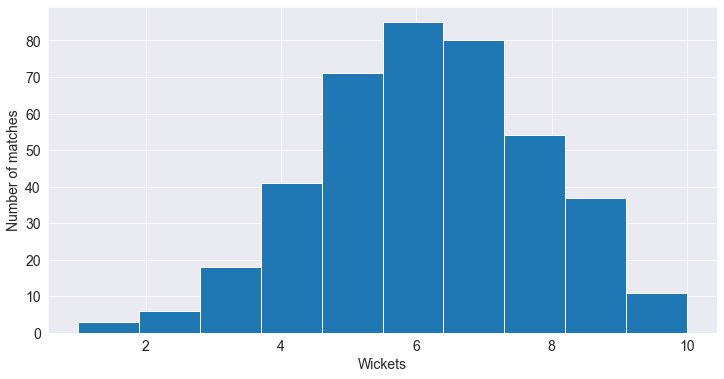

In [95]:
plt.figure(figsize=(12,6))
plt.hist(bowling_first_team['win_by_wickets'])
plt.xlabel('Wickets')
plt.ylabel('Number of matches')
plt.show()